In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, integrate
%matplotlib inline

### Smooth local paths
We will use cubic spirals to generate smooth local paths. Without loss of generality, as $\theta$ smoothly changes from 0 to 1, we impose a condition on the curvature as follows

$\kappa = f'(x) = K(x(1-x))^n $

This ensures curvature vanishes at the beginning and end of the path. Integrating, the yaw changes as
$\theta = \int_0^x f'(x')dx'$

With $n = 1$ we get a cubic spiral, $n=2$ we get a quintic spiral and so on. Let us use the sympy package to find the family of spirals

1. Declare $x$ a Symbol

2. You want to find Integral of $f'(x)$

3. You can choose $K$ so that all coefficients are integers

Verify if $\theta(0) = 0$ and $\theta(1) = 1$

In [2]:
K =  30 #choose for cubic/quintic
n =  2 #choose for cubic (n=1)/ quintic (n=2)
x =  Symbol('x') #declare as Symbol
print(integrate(K*(x*(1-x))**n, x)) # complete the expression

6*x**5 - 15*x**4 + 10*x**3


In [3]:
# Return a cubic curve equation
def cubic_equation(K=6):
  x = Symbol('x')
  n = 1
  return integrate(K*(x * (1-x))**n, x)

# Return a quintic curve equation
def quintic_equation(K=30):
  x = Symbol('x')
  n = 2
  return integrate(K * (x * (1-x))**n, x)

In [4]:
print(f"Cubic equation: {cubic_equation(6)}")
print(f"Quintic equation: {quintic_equation(30)}")

Cubic equation: -2*x**3 + 3*x**2
Quintic equation: 6*x**5 - 15*x**4 + 10*x**3


Another way of doing this is through matrice multiplication

**Cubic Equations**

$f(x) = a x^3 +b x^2 + c x + d$

$f'(x) = 3ax^2 + 2bx + c$

Subjected to constraints $f(0) = 0$, $f(1) = 1$, $f'(0) = 0$ and $f'(1) = 0$

**Quintic Equations**

$f(x) = a x^5 +b x^4 + c x^3 + d x^2 + e x + f$

$f'(x) = 5ax^4 + 4bx^3 + 3cx^2 + 2dx + e$

$f''(x) = 20ax^3 + 12bx^2 + 6cx + 2d$

Subjected to constraints $f(0) = 0$, $f(1) = 1$, $f'(0) = 0$, $f'(1) = 0$, $f''(0) = 0$ and $f''(1) = 0$

In [5]:
# Cubic coefficients
C = np.array([
              [0, 0, 0, 1],
              [1, 1, 1, 1],
              [0, 0, 1, 0],
              [3, 2, 1, 0]
])
B = np.array([0, 1, 0, 0]).reshape((-1, 1))
cubic_coeffs = np.linalg.inv(C) @ B
print(f"Cubic coefficients [a,b,c,d]: {cubic_coeffs.reshape((-1))}")

# Quintic coefficients
C = np.array([
              [0, 0, 0, 0, 0, 1],
              [1, 1, 1, 1, 1, 1],
              [0, 0, 0, 0, 1, 0],
              [5, 4, 3, 2, 1, 0],
              [0, 0, 0, 2, 0, 0],
              [20, 12, 6, 2, 0, 0]
])
B = np.array([0, 1, 0, 0, 0, 0]).reshape((-1, 1))
quintic_coeffs = np.linalg.inv(C) @ B
print(f"Quintic coefficients [a,b,c,d,e,f]: {quintic_coeffs.reshape((-1))}")

Cubic coefficients [a,b,c,d]: [-2.  3.  0.  0.]
Quintic coefficients [a,b,c,d,e,f]: [  6. -15.  10.   0.   0.   0.]


Now plot these equations

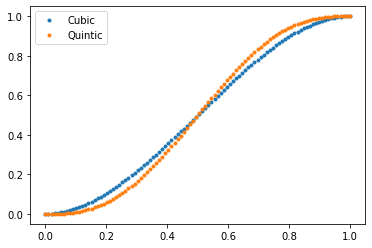

In [6]:
x = np.linspace(0, 1, num=100)
# Note: `num` controlls how many points
thetas = -2*x**3 + 3*x**2
plt.figure()
plt.plot(x, thetas,'.', label="Cubic")
thetas = 6*x**5 - 15*x**4 + 10*x**3
plt.plot(x, thetas,'.', label="Quintic")
plt.legend()
plt.show()

In [7]:
#input can be any theta_i and theta_f (not just 0 and 1)
def cubic_spiral(theta_i, theta_f, n=10):
    x = np.linspace(0, 1, num=n)
    #-2*x**3 + 3*x**2 -> Scale and add offset (min)
    return (theta_f-theta_i)*(-2*x**3 + 3*x**2) + theta_i

def quintic_spiral(theta_i, theta_f, n=10):
    x = np.linspace(0, 1, num=n)   
    #6*x**5 - 15*x**4 + 10*x**3 -> Scale and add offset (min)
    return (theta_f-theta_i)*(6*x**5 - 15*x**4 + 10*x**3) + theta_i

### Plotting
Plot cubic, quintic spirals along with how $\theta$ will change from $\pi/2$ to $0$ when moving in a circular arc. Remember circular arc is when  $\omega $ is constant


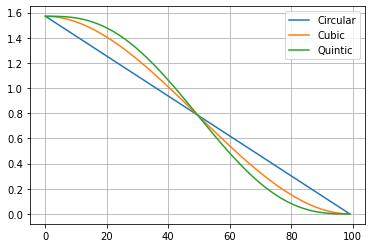

In [8]:
num_pts = 100
theta_i = np.pi/2
theta_f = 0
# Get the points
theta_circle = (theta_f - theta_i) * np.linspace(0, 1, num=num_pts) + theta_i
theta_cubic = cubic_spiral(theta_i, theta_f, n=num_pts)
theta_quintic = quintic_spiral(theta_i, theta_f, n=num_pts)
# Make the plots (data inline)
plt.figure()
plt.plot(theta_circle, label='Circular') # Theta -> Linear
plt.plot(theta_cubic, label='Cubic')
plt.plot(theta_quintic,label='Quintic')
plt.grid()
plt.legend()

## Trajectory

Using the spirals, convert them to trajectories $\{(x_i,y_i,\theta_i)\}$. Remember the unicycle model 

$dx = v\cos \theta dt$

$dy = v\sin \theta dt$

$\theta$ is given by the spiral functions you just wrote. Use cumsum() in numpy to calculate {(x_i, y_i)}

What happens when you change $v$?

In [9]:
v = 1
dt = 0.02

# Create a function to return points
def ret_spirals(theta_i, theta_f, num_pts):
  # Get the points
  theta_circle = (theta_f - theta_i) * np.linspace(0, 1, num=num_pts) + theta_i
  theta_cubic = cubic_spiral(theta_i, theta_f, n=num_pts)
  theta_quintic = quintic_spiral(theta_i, theta_f, n=num_pts)
  #cubic
  x_cubic = np.cumsum(v*np.cos(theta_cubic)*dt)
  y_cubic = np.cumsum(v*np.sin(theta_cubic)*dt)
  cubic_pts = {"x": x_cubic, "y": y_cubic}
  #Quintic
  x_quintic = np.cumsum(v*np.cos(theta_quintic)*dt)
  y_quintic = np.cumsum(v*np.sin(theta_quintic)*dt)
  quintic_pts = {"x": x_quintic, "y": y_quintic}
  #Circular
  x_circle = np.cumsum(v*np.cos(theta_circle)*dt)
  y_circle = np.cumsum(v*np.sin(theta_circle)*dt)
  circular_pts = {"x": x_circle, "y": y_circle}
  return cubic_pts, quintic_pts, circular_pts


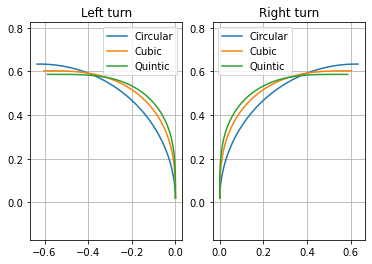

In [10]:
num_pts = int(v/dt)
# plot trajectories for circular/ cubic/ quintic for left and right turns
plt.figure()
plt.subplot(1,2,1)  # Left turn -> np.pi/2 to np.pi
plt.axis('equal')
plt.title("Left turn")
cubic_pts, quintic_pts, circular_pts = ret_spirals(np.pi/2, np.pi, num_pts)
plt.plot(circular_pts["x"], circular_pts["y"], label='Circular')
plt.plot(cubic_pts["x"], cubic_pts["y"], label='Cubic')
plt.plot(quintic_pts["x"], quintic_pts["y"], label='Quintic')
plt.legend()
plt.grid()
plt.subplot(1,2,2)  # Right turn -> np.pi/2 to 0
plt.axis('equal')
plt.title("Right turn")
cubic_pts, quintic_pts, circular_pts = ret_spirals(np.pi/2, 0, num_pts)
plt.plot(circular_pts["x"], circular_pts["y"], label='Circular')
plt.plot(cubic_pts["x"], cubic_pts["y"], label='Cubic')
plt.plot(quintic_pts["x"], quintic_pts["y"], label='Quintic')
plt.legend()
plt.grid()

## Symmetric poses

We have been doing only examples with $|\theta_i - \theta_f| = \pi/2$. 

What about other orientation changes? Given below is an array of terminal angles (they are in degrees!). Start from 0 deg and plot the family of trajectories

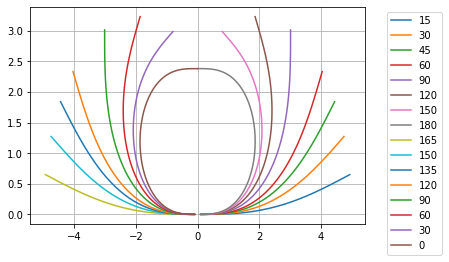

In [11]:
dt = 0.1
thetas = np.deg2rad([15, 30, 45, 60, 90, 120, 150, 180]) #convert to radians
plt.figure()
for tf in thetas:
    t = cubic_spiral(0, tf,50)
    x = np.cumsum(np.cos(t)*dt)
    y = np.cumsum(np.sin(t)*dt)
    plt.plot(x, y, label=f"{np.rad2deg(tf):.0f}")

# On the same plot, move from 180 to 180 - theta
thetas = np.pi - np.deg2rad([15, 30, 45, 60, 90, 120, 150, 180])
for tf in thetas:
    t = cubic_spiral(np.pi, tf, 50)
    x = np.cumsum(np.cos(t)*dt)
    y = np.cumsum(np.sin(t)*dt)
    plt.plot(x, y, label=f"{np.rad2deg(tf):.0f}")

plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Modify your code to print the following for the positive terminal angles $\{\theta_f\}$
1. Final x, y position in corresponding trajectory: $x_f, y_f$ 
2. $\frac{y_f}{x_f}$ and $\tan \frac{\theta_f}{2}$

What do you notice? 
What happens when $v$ is doubled?

In [12]:
dt = 0.05
v = 2.0
thetas = np.deg2rad([15, 30, 45, 60, 90, 120, 150, 180]) #convert to radians
for tf in thetas:
    t = cubic_spiral(0, tf,100)
    x = np.cumsum(v*np.cos(t)*dt)
    y = np.cumsum(v*np.sin(t)*dt)
    print(f"tf:{np.rad2deg(tf):0.1f} xf:{x[-1]:0.3f} yf:{y[-1]:0.3f} yf/xf:{y[-1]/x[-1]:0.3f} tan(theta/2):{np.tan(tf/2):0.3f}")

tf:15.0 xf:9.873 yf:1.300 yf/xf:0.132 tan(theta/2):0.132
tf:30.0 xf:9.497 yf:2.545 yf/xf:0.268 tan(theta/2):0.268
tf:45.0 xf:8.892 yf:3.683 yf/xf:0.414 tan(theta/2):0.414
tf:60.0 xf:8.087 yf:4.669 yf/xf:0.577 tan(theta/2):0.577
tf:90.0 xf:6.041 yf:6.041 yf/xf:1.000 tan(theta/2):1.000
tf:120.0 xf:3.743 yf:6.484 yf/xf:1.732 tan(theta/2):1.732
tf:150.0 xf:1.610 yf:6.010 yf/xf:3.732 tan(theta/2):3.732
tf:180.0 xf:-0.000 yf:4.812 yf/xf:-7880729543884461.000 tan(theta/2):16331239353195370.000


These are called *symmetric poses*. With this spiral-fitting approach, only symmetric poses can be reached. 

In order to move between any 2 arbitrary poses, you will have to find an intermediate pose that is pair-wise symmetric to the start and the end pose. 

What should be the intermediate pose? There are infinite possibilities. We would have to formulate it as an optimization problem. As they say, that has to be left for another time!